In [209]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as sct
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Shapiro - Wilk

In [47]:
normal_data = sct.norm.rvs(loc=10, scale=4, size=1000)
non_normal_data = sct.weibull_max.rvs(c=1,loc=10, scale=4, size=1000)
expon_data = sct.expon.rvs(loc=10, scale=4, size=1000)
a = np.random.randint(-33,450, 1000)


print(sct.shapiro(normal_data))
print(sct.shapiro(expon_data))
print(sct.shapiro(non_normal_data))
print(sct.shapiro(a))

alpha = 1e-3
k1, p = sct.shapiro(expon_data)
if  p <alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

ShapiroResult(statistic=0.9983426332473755, pvalue=0.45632848143577576)
ShapiroResult(statistic=0.7871527671813965, pvalue=3.5074946861037555e-34)
ShapiroResult(statistic=0.8407145738601685, pvalue=1.745717820688661e-30)
ShapiroResult(statistic=0.9513610601425171, pvalue=1.1457276182930149e-17)
The null hypothesis can be rejected


## Jarque-Bera

In [48]:
normal_data = sct.norm.rvs(loc=10, scale=4, size=10000)
non_normal_data = sct.weibull_max.rvs(c=1,loc=10, scale=4, size=10000)
a = np.random.randint(-33,450, 10000)

print(sct.jarque_bera(normal_data))
print(sct.jarque_bera(non_normal_data))
print(sct.jarque_bera(a))


alpha = 1e-3
k1, p = sct.jarque_bera(non_normal_data)
if  p <alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

Jarque_beraResult(statistic=0.13299792917616862, pvalue=0.9356638846533645)
Jarque_beraResult(statistic=21790.275193235433, pvalue=0.0)
Jarque_beraResult(statistic=613.9694537861562, pvalue=0.0)
The null hypothesis can be rejected


## Normal Tests - D'agostino and Persons

In [49]:
normal_data = sct.norm.rvs(loc=10, scale=4, size=1000)
non_normal_data = sct.weibull_max.rvs(c=1,loc=10, scale=4, size=1000)
a = np.random.randint(-33,450, 1000)

print(sct.normaltest(normal_data))
print(sct.normaltest(non_normal_data))
print(sct.normaltest(a))


alpha = 1e-3
k1, p = sct.normaltest(non_normal_data)
if  p <alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

NormaltestResult(statistic=1.917406024432034, pvalue=0.383389815556934)
NormaltestResult(statistic=400.4243346864975, pvalue=1.1193361062007877e-87)
NormaltestResult(statistic=569.0719807630416, pvalue=2.6766369838032297e-124)
The null hypothesis can be rejected


## Anderson-Darling Normality Test

In [68]:
def anderson_normality_test(data: np.ndarray, dist: str)-> None:
    result = sct.anderson(data, dist=dist)
    print(f'Statistic: {np.round(result.statistic,3)}')
    for i in range(len(result.critical_values)):
        sig_lev, crit_val = result.significance_level[i] , result.critical_values[i]
        if  result.statistic <crit_val:
            print(f"Probably {dist} critical value at {sig_lev} level of significance")
        else:
             print(f"Probably not {dist} critical value at {sig_lev} level of significance")

In [75]:
normal_data  = sct.norm.rvs(loc=10, scale=4, size=1000)
#non_normal_data = sct.weibull_max.rvs(c=1,loc=10, scale=4, size=1000)
#expon_data = sct.expon.rvs(loc=10, scale=4, size=1000)
#a = np.random.randint(-33,450, 1000)
anderson_normality_test(normal_data, 'expon')


Statistic: inf
Probably not expon critical value at 15.0 level of significance
Probably not expon critical value at 10.0 level of significance
Probably not expon critical value at 5.0 level of significance
Probably not expon critical value at 2.5 level of significance
Probably not expon critical value at 1.0 level of significance


####  Critical values provided are for the following significance levels:

#### normal/exponential
15%, 10%, 5%, 2.5%, 1%
#### logistic
25%, 10%, 5%, 2.5%, 1%, 0.5%
#### Gumbel
25%, 10%, 5%, 2.5%, 1%

If the returned statistic is larger than these critical values then for the corresponding significance level, the null hypothesis that the data come from the chosen distribution can be rejected. The returned statistic is referred to as ‘A2’ in the references.


## ChiSquare

#### The Chi Square Test for Normality can only be used if:

- Your expected value for the number of sample observations for each level is greater than 5
- Your data is randomly sampled
- The variable you are studying is categorical.
- If your variable is continuous, you will need to bin the data before using the chi-square test for normality.

In [92]:
alpha = 1e-3
normal_data  = sct.norm.rvs(loc=10, scale=4, size=1000)
non_normal_data = sct.weibull_max.rvs(c=1,loc=10, scale=4, size=1000)
expon_data = sct.expon.rvs(loc=10, scale=4, size=1000)
k1, p = sct.chisquare(non_normal_data)
if  p <alpha:
    print(f"The null hypothesis can be rejected  {np.round(k1,3)}, {np.round(p,5)}")
else:
    print(f"The null hypothesis cannot be rejected {k1}, {p}")

The null hypothesis can be rejected  2964.008, 0.0


## QQ Plot para dados Normais

In [ ]:
normal_data = sct.norm.rvs(loc=10, scale=4, size=1000)
sm.qqplot(normal_data, fit= True, line='45')

In [ ]:
non_normal_data = sct.weibull_max.rvs(c=1,loc=10, scale=4, size=1000)
sm.qqplot(non_normal_data, fit= True, line='45')

In [ ]:
##Gerando amostra aleatoria numpy
a = np.random.randint(-33,450, 1000)
sm.qqplot(a, fit= True, line='45')


## Testes de hipotéses

Em estatística, bootstrapping (ou simplesmente bootstrap, em inglês algo como "alça de botina") é um método de reamostragem proposto por Bradley Efron em 1979. Utiliza-se para aproximar distribuição na amostra de um levantamento estatístico. Usa-se frequentemente para aproximar o viés ou a variância de um conjunto de dados estatísticos, assim como para construir intervalos de confiança ou realizar contrastes de hipóteses sobre parâmetros de interesse. Na maior parte dos casos não pode obter-se expressões fechadas para as aproximações bootstrap e portanto é necessário obter reamostragens em um ordenador para por em prática o método. A enorme capacidade de cálculo dos computadores atuais facilita consideravelmente a aplicabilidade deste método tão custoso computacionalmente.



In [109]:
def permuted_iid_samples(data1: np.ndarray, data2: np.ndarray) -> tuple:
    '''
        Função usada para permutar os dados, normalmente estamos trabalhando com hipoteses de que as duas amostras são iguais. 
        
    '''
    data = np.concatenate((data1, data2))
    permuted_data = np.random.permutation(data)
    permuted_sample_1 = permuted_data[:len(data1)]
    permuted_sample_2 = permuted_data[len(data1):]
    
    return permuted_sample_1, permuted_sample_2
       
    

In [210]:
b = np.random.randint(150,350,1000)
a=  np.random.randint(222,350,1000)

In [171]:
def sample_replicates(data1: np.ndarray, data2: np.ndarray, function, size=1) -> list:
    '''
    
    '''
    permuted_replicates = np.empty(size)
    for i in range(size):
        perm_sample1, perm_sample2 = permuted_iid_samples(data1, data2)
        permuted_replicates[i] = function(perm_sample1, perm_sample2)
    
    return permuted_replicates

In [172]:
def means_diff(data1: np.ndarray, data2: np.ndarray) -> float:
    '''
        Retorna a diferença entre as médias de duas amostras
    '''
    return np.mean(data1) - np.mean(data2)

In [211]:
n_bootstrap = 100000
replicates = sample_replicates(a,b, means_diff,n_bootstrap)
empirical = means_diff(a,b)

In [212]:
p = np.sum(replicates >= empirical)/len(replicates)
print(f'The p-value  for the test-statistic of {empirical:.2f} is {p:.3f}')

The p-value  for the test-statistic of 33.51 is 0.000


In [213]:
confidence_interval = np.percentile(replicates,[2.5,97.5])
print(f'Confidence interval is {confidence_interval}')

Confidence interval is [-4.389    4.45505]


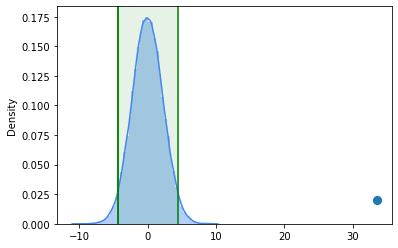

In [214]:
ax = sns.distplot(replicates, color = palette[0])
ax.axvline(confidence_interval[0],color = 'green')
ax.axvline(confidence_interval[0],color = 'green')
ax.axvline(confidence_interval[1],color = 'green')
ax.axvspan(confidence_interval[0],confidence_interval[1], color='green', alpha=0.1)
ax = sns.scatterplot(x=np.array([empirical]),y=0.020, s=100)
